# Import required Libraries & Packages

In [8]:
#Import warnings
import warnings as wrg
wrg.filterwarnings('ignore')

In [9]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import sklearn
#from sklearn.decomposition import FactorAnalysis

# Read the loan data file

- Read the loan data file

In [10]:
#Read the csv file
loan_data= pd.read_csv("loan.csv", encoding = "ISO-8859-1")

#Check rows and columns count in the file
print(loan_data.shape)

loan_data.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Cleaning the Data

In [11]:
#check the percentage of null values in each column
loan_data.isnull().sum()/len(loan_data) * 100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [12]:
#As we see above, there are a lot of columns where all records are null(100%) 
# i.e., count of null is same as total count of records 39717
# We can drop such columns
loan_data.isnull().sum()==39717
loan_data_clean = loan_data.loc[:,loan_data.isnull().sum()!=39717]

#check column-wise null % again
(loan_data_clean.loc[:,loan_data_clean.isnull().sum()!=0].isnull().sum()/len(loan_data_clean))*100

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

In [13]:
#columns mths_since_last_delinq, mths_since_last_record, next_pymnt_d, desc still have high null percentages
#So we can drop these as these will influence tru value in analysis
loan_data_clean.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc'],axis=1,inplace=True)
(loan_data_clean.loc[:,loan_data_clean.isnull().sum()!=0].isnull().sum()/len(loan_data_clean))*100

emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
dtype: float64

In [10]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [11]:
#Out of all below are the columns that are irrelevant for our analysis and hence can be dropped
#member_id
#url

#zipcode
#initial_list_status
#collection_recovery_fee
#policy_code
#emp_title
#title
#last_credit_pull_d
#earliest_cr_line
#total_pymnt
#total_rec_int
#total_rec_late_fee
#total_rec_prncp
#last_credit_pull_d
#last_pymnt_amnt
#last_pymnt_d
#collections_12_mths_ex_med
#collection_recovery_fee
#earliest_cr_line
#initial_list_status

loan_data_clean.drop(['member_id','url','zip_code','initial_list_status','collection_recovery_fee','policy_code','emp_title','title','last_credit_pull_d','earliest_cr_line','total_pymnt','total_rec_int','total_rec_late_fee','total_rec_prncp','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','collections_12_mths_ex_med','collection_recovery_fee','earliest_cr_line','initial_list_status',],axis=1,inplace=True)

In [12]:
loan_data_clean.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [13]:
#there is just one value in this column, so we can drop this as this would not be of much use in further analysis. 
loan_data_clean.drop(['pymnt_plan'],axis=1,inplace=True)

In [14]:
(loan_data_clean.loc[:,loan_data_clean.isnull().sum()!=0].isnull().sum()/len(loan_data_clean))*100

emp_length                  2.706650
revol_util                  0.125891
chargeoff_within_12_mths    0.140998
pub_rec_bankruptcies        1.754916
tax_liens                   0.098195
dtype: float64

In [15]:
#For the above attributes the % of nulls is not so high, we con drop records with null values for above
#loan_data_clean2 = loan_data_clean.loc[()]
#loan_data_clean = loan_data_clean.loc[~(pd.isnull(loan_data_clean.emp_length) | pd.isnull(loan_data_clean.revol_util)| pd.isnull(loan_data_clean.chargeoff_within_12_mths) | pd.isnull(loan_data_clean.pub_rec_bankruptcies) | pd.isnull(loan_data_clean.tax_liens))]
loan_data_clean = loan_data_clean.loc[~(pd.isnull(loan_data_clean.emp_length))]
(len(loan_data_clean)/len(loan_data) )*100

97.29335045446534

In [16]:
#So we have close to 95% records carrying forward for analysis

### Checking for duplicates and uniqueness of non-null values

In [17]:
#id is the unique value for every record, lets make sure there is no duplicacy in the data
#loan_data_clean.loc[
loan_data_clean.loc[loan_data_clean.duplicated('id')==True]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,out_prncp,out_prncp_inv,total_pymnt_inv,recoveries,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [18]:
#So no duplicate loan application, lets do a generic drop duplicates so that there is no duplicate record in the dataset
loan_data_clean.drop_duplicates()
loan_data_clean.shape

(38642, 35)

### Converting columns to appropriate datatypes & Format

In [19]:
loan_data_clean.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,out_prncp,out_prncp_inv,total_pymnt_inv,recoveries,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0.00,0.00,5833.84,0.00,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0.00,0.00,1008.71,117.08,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0.00,0.00,3005.67,0.00,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,0.00,0.00,12231.89,0.00,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,524.06,524.06,3513.33,0.00,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
#storing term as 36,60 etc., removing the string months to standardize term for further use
#loan_data_clean3 = loan_data_clean
loan_data_clean['term']=loan_data_clean.term.str.replace(' months','').astype(int)

#storing int_rate, revol_util without the % symbol
loan_data_clean['int_rate']=loan_data_clean.int_rate.str.replace('%','').astype(float)
loan_data_clean['revol_util']=loan_data_clean.revol_util.str.replace('%','').astype(float)

loan_data_clean.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,out_prncp,out_prncp_inv,total_pymnt_inv,recoveries,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,...,0.00,0.00,5833.84,0.00,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,...,0.00,0.00,1008.71,117.08,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,...,0.00,0.00,3005.67,0.00,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,...,0.00,0.00,12231.89,0.00,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,...,524.06,524.06,3513.33,0.00,INDIVIDUAL,0,0.0,0,0.0,0.0


In [21]:
#converting date columns to date datatype

loan_data_clean['issue_d'] = pd.to_datetime(loan_data_clean.issue_d,format='%b-%y')
#loan_data_clean['last_pymnt_d'] = pd.to_datetime(loan_data_clean.last_pymnt_d,format='%b-%y')
            

- For ease of analyzing, lets create bucket of values for attributes line Annual income, dti, funded amount.
- These buckets will ease the analysis when plotting distributions

							

In [22]:
#Below is the detail of the Buckets used for each attribute

#							Bucket
# < annual_inc <= 30000			0
#30000 < annual_inc <= 35000		1
#35000 < annual_inc <= 40000		2
#40000 < annual_inc <= 45000		3
#45000 < annual_inc <= 55000		4
#55000 < annual_inc <= 65000		5
#65000 < annual_inc <= 75000		6
#75000 < annual_inc <= 90000		7
#90000 < annual_inc <= 120000	8
#120000 < annual_inc 			9
#	
#				Bucket
#dti <= 4			0
#4 < dti <= 6		1
#6 < dti <= 8		2
#8 < dti <= 10		3
#10 < dti <= 12		4
#12 < dti <= 16		5
#16 < dti <= 18		6
#18 < dti <= 20		7
#20 < dti <= 22		8
#dti > 22	0
#								Bucket
#funded amount<=2000					0
#2000 < funded amount <= 4000		1
#4000 < funded amount <= 6000		2
#6000 < funded amount <= 8000		3
#8000 < funded amount <= 10000		4
#10000 < funded amount <= 12000		5
#12000 < funded amount <= 14000		6
#14000 < funded amount <= 16000		7
#16000 < funded amount <= 22000		8
#funded amount > 22000				9
#

In [23]:
# Creating a function to derive bucketing based Anual income

def fn_GetAnualIncomeRange(iIncome):
    sAnualBucket = '10' # Variable to hold Bucket information
    if iIncome <= 30000:
        sAnualBucket   = '0'
    elif  iIncome > 30000 and iIncome <= 35000:
        sAnualBucket   = '1'
    elif  iIncome > 35000 and iIncome <= 40000:
        sAnualBucket   = '2'
    elif  iIncome > 40000 and iIncome <= 45000:
        sAnualBucket   = '3'
    elif  iIncome > 45000 and iIncome <= 55000:
        sAnualBucket   = '4'
    elif  iIncome > 55000 and iIncome <= 65000:
        sAnualBucket   = '5'
    elif  iIncome > 65000 and iIncome <= 75000:
        sAnualBucket   = '6'
    elif  iIncome > 75000 and iIncome <= 90000:
        sAnualBucket   = '7'
    elif  iIncome > 90000 and iIncome <= 120000:
        sAnualBucket   = '8'
    elif  iIncome > 120000:
        sAnualBucket   = '9'
    return sAnualBucket 

# Add Anual income bucket column to DataFrame
loan_data_clean['Bucket_Annual_Income'] = loan_data_clean['annual_inc'].apply(fn_GetAnualIncomeRange)

# Creating a function to derive bucketing based dti
def fn_GetDtiRange(iDti):
    sDtiBucket = '10' # Variable to hold Bucket information
    if iDti <= 4:
        sDtiBucket   = '0'
    elif  iDti > 4 and iDti <= 6:
        sDtiBucket   = '1'
    elif  iDti > 6 and iDti <= 8:
        sDtiBucket   = '2'
    elif  iDti > 8 and iDti <= 10:
        sDtiBucket   = '3'
    elif  iDti > 10 and iDti <= 12:
        sDtiBucket   = '4'
    elif  iDti > 12 and iDti <= 16:
        sDtiBucket   = '5'
    elif  iDti > 16 and iDti <= 18:
        sDtiBucket   = '6'
    elif  iDti > 18 and iDti <= 20:
        sDtiBucket   = '7'
    elif  iDti > 20 and iDti <= 22:
        sDtiBucket   = '8'
    elif  iDti > 22:
        sDtiBucket   = '9'
    return sDtiBucket 

# Add dti bucket column to DataFrame
loan_data_clean['Bucket_dti'] = loan_data_clean['dti'].apply(fn_GetDtiRange)

#Creating a function to derive bucketing based
def fn_GetFundedAmountRange(iFunded):
    sFundedBucket = '10' # Variable to hold Bucket information
    if iFunded <= 2000:
        sFundedBucket  = '0'
    elif  iFunded > 2000 and iFunded <= 4000:
        sFundedBucket  = '1'
    elif  iFunded > 4000 and iFunded <= 6000:
        sFundedBucket  = '2'
    elif  iFunded > 6000 and iFunded <= 8000:
        sFundedBucket  = '3'
    elif  iFunded > 8000 and iFunded <= 10000:
        sFundedBucket  = '4'
    elif  iFunded > 10000 and iFunded <= 12000:
        sFundedBucket  = '5'
    elif  iFunded > 12000 and iFunded <= 14000:
        sFundedBucket  = '6'
    elif  iFunded > 14000 and iFunded <= 16000:
        sFundedBucket  = '7'
    elif  iFunded > 16000 and iFunded <= 22000:
        sFundedBucket  = '8'
    elif  iFunded > 22000:
        sFundedBucket  = '9'     
    return sFundedBucket

# Add funded amount bucket column to DataFrame

loan_data_clean['Bucket_Funded_Amount'] = loan_data_clean['funded_amnt'].apply(fn_GetFundedAmountRange)

# Exploratory Data Analysis
    ## Univariate Analysis
    ## BiVariate Analysis

### Univariate Analysis
- Lets begin with analyzing relevant attributes one at a time and assess its impact on whether it results in loan defaulting or not

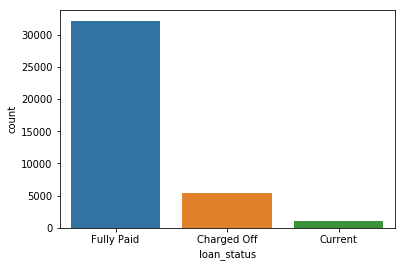

In [24]:
#Lets first check the span of various loan status in the data
sns.countplot(x='loan_status',data=loan_data_clean)

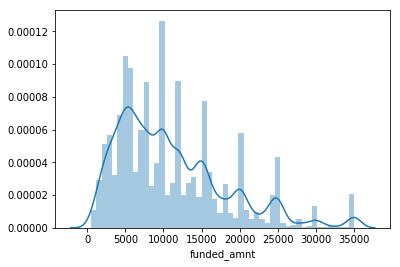

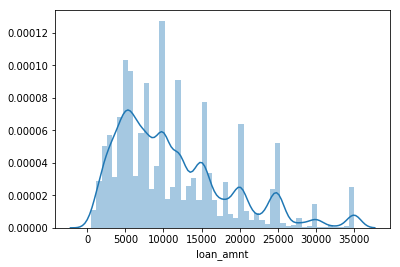

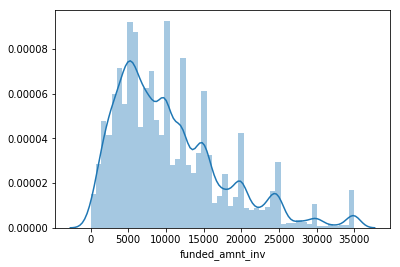

In [25]:
# Look at the distributions of Funded Amount, DTI, Annual Income
plt.figure('Distributions')
sns.distplot(loan_data_clean['funded_amnt'])
plt.show()

sns.distplot(loan_data_clean['loan_amnt'])#dti
plt.show()

sns.distplot(loan_data_clean['funded_amnt_inv'])#annual_inc
plt.show()

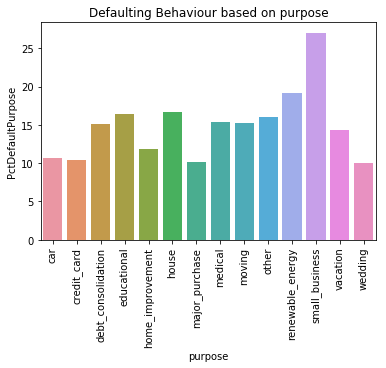

In [26]:
# Analysing buckets of Purpose and getting the data for plotting
by_purpose1 = loan_data_clean.pivot_table(values=['id'], index=['purpose', 'loan_status'], aggfunc='count')
by_purpose2 = by_purpose1
by_purpose3 = by_purpose2.pivot_table('id', ['purpose'], 'loan_status')
by_purpose3['PctDefaultPurpose'] = by_purpose3['Charged Off'] / ( by_purpose3['Charged Off'] +  by_purpose3['Fully Paid']) * 100
by_purpose3.reset_index(inplace = True) 
barPurpose = sns.barplot(x='purpose', y='PctDefaultPurpose', data=by_purpose3)
barPurpose.set_xticklabels(by_purpose3['purpose'],rotation=90)
plt.title("Defaulting Behaviour based on purpose")
plt.show()

- Observation: There are few purposes for which percentage of default is slightly higher than average - for exampe - small_business, educational, renewable. 

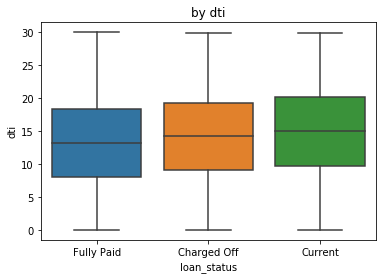

In [27]:
#Visualizing spread of dti values for various loan statuses
plt.title("by dti")
sns.boxplot(x='loan_status', y='dti', data=loan_data_clean)
plt.show()

- As we see above, the median dti for Charged off loans is a bit higher than the Fully Paid loans. This means that borrowers with higher dti (more debts) are slightly more leaned towards Defaulting.

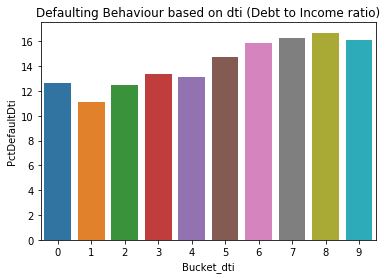

In [28]:
# Analysing buckets of dti and getting the data for plotting
by_dti1 = loan_data_clean.pivot_table(values=['id'], index=['Bucket_dti', 'loan_status'], aggfunc='count')
by_dti2 = by_dti1
by_dti3 = by_dti2.pivot_table('id', ['Bucket_dti'], 'loan_status')
by_dti3

by_dti3['PctDefaultDti'] = by_dti3['Charged Off'] / ( by_dti3['Charged Off'] +  by_dti3['Fully Paid']) * 100
by_dti3
by_dti3.reset_index(inplace = True) 

sns.barplot(x='Bucket_dti', y='PctDefaultDti', data=by_dti3)
plt.title("Defaulting Behaviour based on dti (Debt to Income ratio)")
plt.show()

- Observation: As dti increases, percentage of default cases (or amounts) increases

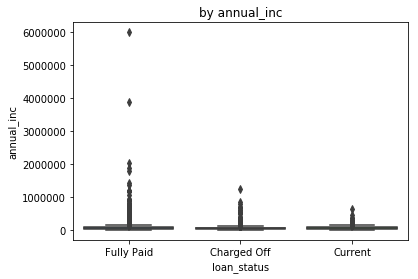

In [29]:
#Analyzing influence of annual income on loan Defaults 
plt.title("by annual_inc")
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_clean)
plt.show()

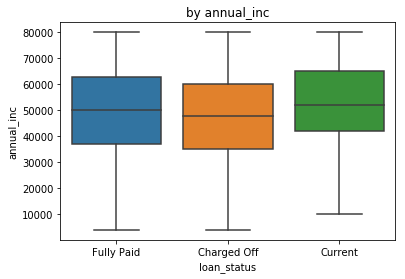

In [30]:
#Since the above Data has lot of outliers, visualizing with more appropriate income range
plt.title("by annual_inc")
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_clean.loc[loan_data_clean.annual_inc<=80000])
plt.show()

- As we see above, the median annual inc for Fully Paid is slightly higher than the Charged off loans. So annual income could probably be an indicator for a loan being Defaulted. Lets analyze this a bit more

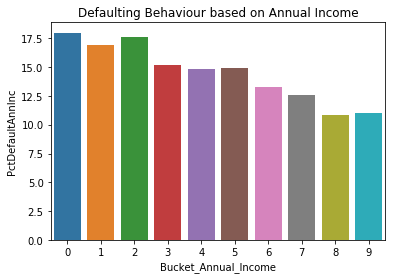

In [31]:
# Analysing buckets of Annual Income and getting the data for plotting
by_anninc1 = loan_data_clean.pivot_table(values=['id'], index=['Bucket_Annual_Income', 'loan_status'], aggfunc='count')
by_anninc2 = by_anninc1
by_anninc3 = by_anninc2.pivot_table('id', ['Bucket_Annual_Income'], 'loan_status')
by_anninc3['PctDefaultAnnInc'] = by_anninc3['Charged Off'] / ( by_anninc3['Charged Off'] +  by_anninc3['Fully Paid']) * 100
by_anninc3
by_anninc3.reset_index(inplace = True) 
sns.barplot(x='Bucket_Annual_Income', y='PctDefaultAnnInc', data=by_anninc3)
plt.title("Defaulting Behaviour based on Annual Income")
plt.show()

- Observation: As Annual Income decreases, percentage of default cases (or amounts) increases

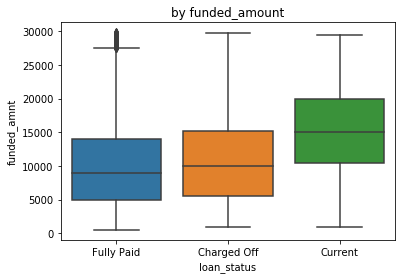

In [32]:
#Lets examine the spread od loan amount funded against various application loan status to assess if loan amount causes resulting in Defaulting
plt.title("by funded_amount")
sns.boxplot(x='loan_status', y='funded_amnt', data=loan_data_clean.loc[loan_data_clean.funded_amnt<30000])
plt.show()

- The median amount for Fully Paid and Charged Off status is a little varying and could bean indicator influencing a loan to be Defaulted
- Lets dig it a little deeper

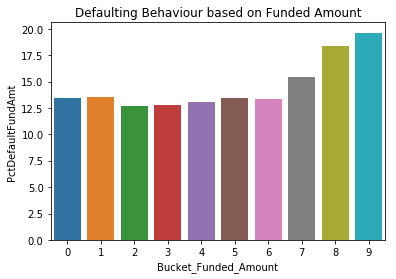

In [33]:
# Analysing buckets of Funded Amount and getting the data for plotting
by_fundamt1 = loan_data_clean.pivot_table(values=['id'], index=['Bucket_Funded_Amount', 'loan_status'], aggfunc='count')
by_fundamt2 = by_fundamt1
by_fundamt3 = by_fundamt2.pivot_table('id', ['Bucket_Funded_Amount'], 'loan_status')
by_fundamt3['PctDefaultFundAmt'] = by_fundamt3['Charged Off'] / ( by_fundamt3['Charged Off'] +  by_fundamt3['Fully Paid']) * 100
by_fundamt3.reset_index(inplace = True) 
sns.barplot(x='Bucket_Funded_Amount', y='PctDefaultFundAmt', data=by_fundamt3)
plt.title("Defaulting Behaviour based on Funded Amount")
plt.show()

- Observation: As Funding Amount increases, percentage of default cases (or amounts) increases

- Lets now see if the house ownership has any bearing with the Loan defaulting

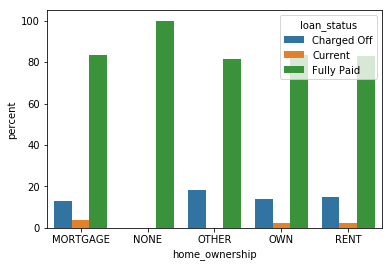

In [34]:
#Analyzing the variation by home ownership of the loan applicant

by_home_ownership = loan_data_clean.groupby(['home_ownership','loan_status']).agg({'id':'count'})

by_home_ownership_pcts = by_home_ownership.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename_axis(None, axis=1)
by_home_ownership_pcts.rename(columns={'id':'percent'},inplace=True)
by_home_ownership_pcts
sns.barplot(x='home_ownership',hue='loan_status',data=by_home_ownership_pcts,y='percent')

- Home ownership doesn't seem to be revealing any strong association with defaulting

- Lets do a similar analysis on Employment length

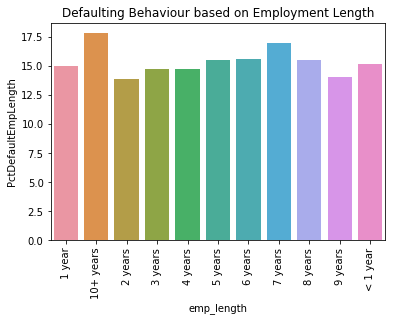

In [35]:
# Analysing buckets of Employment Length and getting the data for plotting
by_emp_length1 = loan_data_clean.pivot_table(values=['funded_amnt'], index=['emp_length', 'loan_status'], aggfunc='sum')
by_emp_length2 = by_emp_length1
by_emp_length3 = by_emp_length2.pivot_table('funded_amnt', ['emp_length'], 'loan_status')
by_emp_length3['PctDefaultEmpLength'] = by_emp_length3['Charged Off'] / ( by_emp_length3['Charged Off'] +  by_emp_length3['Fully Paid']) * 100
by_emp_length3
by_emp_length3.reset_index(inplace = True) 
barEmpLength = sns.barplot(x='emp_length', y='PctDefaultEmpLength', data=by_emp_length3)
barEmpLength.set_xticklabels(by_emp_length3['emp_length'],rotation=90)
plt.title("Defaulting Behaviour based on Employment Length")
plt.show()


- Observation: there is no strong relationship/pattern between emp_length and loan Defaults. So this doesn't seem to be any influencing factor

- Lets also check whether the state of loan applicant also has a bearing with defaulting. Lets say that states where more than 15% loans are defaulted should be reconsidered when approving newer loans


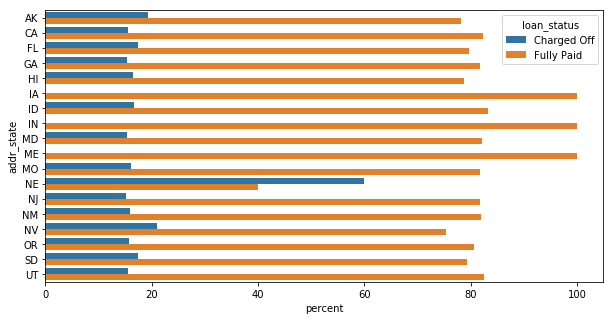

In [36]:

by_addr_state = loan_data_clean.groupby(['addr_state','loan_status']).agg({'id':'count'})

by_addr_state_pcts = by_addr_state.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename_axis(None, axis=1)
by_addr_state_pcts.rename(columns={'id':'percent'},inplace=True)
states = by_addr_state_pcts.loc[(by_addr_state_pcts.percent<15) & (by_addr_state_pcts.loan_status=='Charged Off')].addr_state
by_addr_state_pcts = by_addr_state_pcts.loc[~(by_addr_state_pcts.addr_state.isin(states))]
#by_addr_state_pcts

plt.figure(figsize=(10,5))
sns.barplot(y='addr_state',hue='loan_status',data=by_addr_state_pcts.loc[(by_addr_state_pcts.loan_status!='Current')],x='percent')


- So as we see, there are quite a few states (out of a total of 135 states) where the loan getting Defaulted are over 15%. So may be when sanctioning new loans, LC might review the loan application from that state more strictly and approve loan only if other influencing factors are well within the range


- Influence of Interest Rate & Grade of the loan

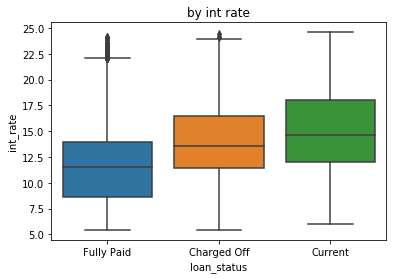

In [37]:
#Spread of interest rates across various loan statuses
plt.title("by int rate")
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_clean)
plt.show()

- As we see above, the median interest rate for Charged off loans is a lot higher than the Fully Paid loans. This means that borrowers getting loans at a higher interest rate are likely to default as applicants have to pay higher amount. 
- Is Interest Rate related to grade?

In [38]:
#Analyzing the variation by grade of the loan

#help(pd.DataFrame.rename)
loan_data_clean.groupby(['grade']).int_rate.mean()

grade
A     7.352316
B    11.029322
C    13.547440
D    15.711009
E    17.706794
F    19.741476
G    21.398794
Name: int_rate, dtype: float64

- Higher the grade, higher is the interest rate. So higher grade loans are more likely to be defaulted

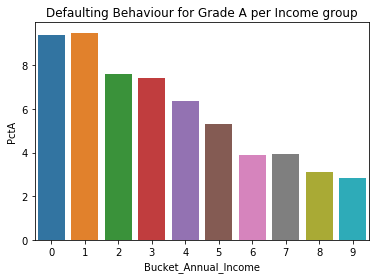

In [39]:
# Analysing buckets of Annual income and Grade getting the data for plotting
by_gradex1 = loan_data_clean.pivot_table(values=['funded_amnt'], index=['Bucket_Annual_Income', 'grade', 'loan_status'], aggfunc='sum')
by_gradex2 = by_gradex1
by_gradex3 = by_gradex2.pivot_table('funded_amnt', ['Bucket_Annual_Income'], ['loan_status', 'grade'])
by_gradex3['PctA'] = by_gradex3['Charged Off', 'A'] / ( by_gradex3['Charged Off', 'A'] +  by_gradex3['Fully Paid', 'A']) * 100
by_gradex3['PctB'] = by_gradex3['Charged Off', 'B'] / ( by_gradex3['Charged Off', 'B'] +  by_gradex3['Fully Paid', 'B']) * 100
by_gradex3['PctC'] = by_gradex3['Charged Off', 'C'] / ( by_gradex3['Charged Off', 'C'] +  by_gradex3['Fully Paid', 'C']) * 100
by_gradex3['PctD'] = by_gradex3['Charged Off', 'D'] / ( by_gradex3['Charged Off', 'D'] +  by_gradex3['Fully Paid', 'D']) * 100
by_gradex3['PctE'] = by_gradex3['Charged Off', 'E'] / ( by_gradex3['Charged Off', 'E'] +  by_gradex3['Fully Paid', 'E']) * 100
by_gradex3['PctF'] = by_gradex3['Charged Off', 'F'] / ( by_gradex3['Charged Off', 'F'] +  by_gradex3['Fully Paid', 'F']) * 100
by_gradex3['PctG'] = by_gradex3['Charged Off', 'G'] / ( by_gradex3['Charged Off', 'G'] +  by_gradex3['Fully Paid', 'G']) * 100
by_gradex3
by_gradex3.reset_index(inplace = True) 
# Defaulting behaviour over income groupe for Grade A
sns.barplot(x='Bucket_Annual_Income', y='PctA', data=by_gradex3)
plt.title("Defaulting Behaviour for Grade A per Income group")
plt.show()

### Bivariate Analysis - Grade and Income Group

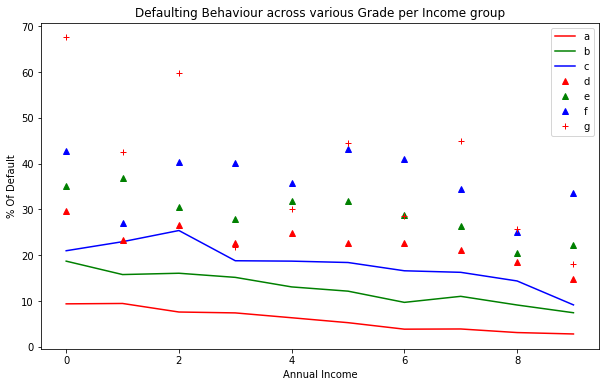

In [40]:
# Defaulting behaviour for various Income Groups per loan Grade
x = by_gradex3.index.tolist()
a = list(by_gradex3['PctA'])
b = list(by_gradex3['PctB'])
c = list(by_gradex3['PctC'])
d = list(by_gradex3['PctD'])
e = list(by_gradex3['PctE'])
f = list(by_gradex3['PctF'])
g = list(by_gradex3['PctG'])
#sns.distplot(uberdf['Cancelled'])
plt.figure(figsize=(10,6))
plt.plot(x, a, 'r-', x, b, 'g-', x, c, 'b-', x, d, 'r^', x, e, 'g^', x, f, 'b^', x, g, 'r+')
plt.xlabel("Annual Income")
plt.ylabel("% Of Default")
plt.title("Defaulting Behaviour across various Grade per Income group")
plt.legend(['a','b','c','d','e','f','g'])
plt.show() 


#### Observation 
- We can see from the above plot that for Grade E, F, G, likelihood of default increases drastially in lower income groups.
- As the loan grade goes up, chances of defaults go high as higher loan grade implies higher interest rate
- From this we can suggest business to not take high risk with multiple drivers (Annual Income, DTI, Funded Amount, Purpose, Grade) .

### Observation Bivariate Analysis - Grade and DTI Group

In [41]:
# Analysing buckets of dti and Grade getting the data for plotting
by_gradey1 = loan_data_clean.pivot_table(values=['funded_amnt'], index=['Bucket_dti', 'grade', 'loan_status'], aggfunc='sum')
by_gradey2 = by_gradey1
by_gradey3 = by_gradey2.pivot_table('funded_amnt', ['Bucket_dti'], ['loan_status', 'grade'])
by_gradey3['PctA'] = by_gradey3['Charged Off', 'A'] / ( by_gradey3['Charged Off', 'A'] +  by_gradey3['Fully Paid', 'A']) * 100
by_gradey3['PctB'] = by_gradey3['Charged Off', 'B'] / ( by_gradey3['Charged Off', 'B'] +  by_gradey3['Fully Paid', 'B']) * 100
by_gradey3['PctC'] = by_gradey3['Charged Off', 'C'] / ( by_gradey3['Charged Off', 'C'] +  by_gradey3['Fully Paid', 'C']) * 100
by_gradey3['PctD'] = by_gradey3['Charged Off', 'D'] / ( by_gradey3['Charged Off', 'D'] +  by_gradey3['Fully Paid', 'D']) * 100
by_gradey3['PctE'] = by_gradey3['Charged Off', 'E'] / ( by_gradey3['Charged Off', 'E'] +  by_gradey3['Fully Paid', 'E']) * 100
by_gradey3['PctF'] = by_gradey3['Charged Off', 'F'] / ( by_gradey3['Charged Off', 'F'] +  by_gradey3['Fully Paid', 'F']) * 100
by_gradey3['PctG'] = by_gradey3['Charged Off', 'G'] / ( by_gradey3['Charged Off', 'G'] +  by_gradey3['Fully Paid', 'G']) * 100
by_gradey3
by_gradey3.reset_index(inplace = True) 

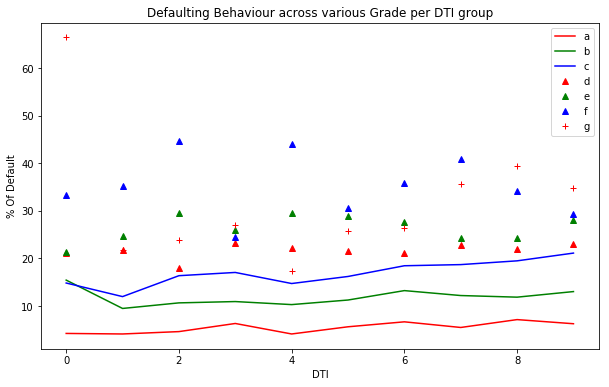

In [42]:
# Defaulting behaviour for various Income Groups per loan Grade
x = by_gradey3.index.tolist()
a = list(by_gradey3['PctA'])
b = list(by_gradey3['PctB'])
c = list(by_gradey3['PctC'])
d = list(by_gradey3['PctD'])
e = list(by_gradey3['PctE'])
f = list(by_gradey3['PctF'])
g = list(by_gradey3['PctG'])
#sns.distplot(uberdf['Cancelled'])

plt.figure(figsize=(10,6))
#plt.plot(x, a, 'r-', x, b, 'g-', x, c, 'b-', x, d, 'r-', x, e, 'g-', x, f, 'b-', x, g, 'r-')
plt.plot(x, a, 'r-', x, b, 'g-', x, c, 'b-', x, d, 'r^', x, e, 'g^', x, f, 'b^', x, g, 'r+')
plt.xlabel("DTI")
plt.ylabel("% Of Default")
plt.title("Defaulting Behaviour across various Grade per DTI group")
plt.legend(['a','b','c','d','e','f','g'],loc='upper right')
plt.show() 

### Obervation
- We can see from the above plot that for Grade E, F, G; likelihood of default increases drastially in higher dti groups (it is around 30%).


### Conclusion
- From this we can suggest business to not take high risk with multiple drivers (Annual Income, DTI, Funded Amount, Purpose, Grade) .